<a href="https://colab.research.google.com/github/marcoplacenti/protein_generation/blob/main/final/data_loader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
import pandas as pd
from IPython.display import clear_output
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/'Colab Notebooks'/project/

/content/drive/MyDrive/Colab Notebooks/project


In [ ]:
ls

data_loader.ipynb  logs/                 model.py      trained_model/
data_raw.xls       main_npy-Copy1.ipynb  oldstuff/     words.model.pth
dataset.csv        mini_pro_gen_final    __pycache__/


In [ ]:
def get_sequence_and_conditional_tags(pfam_id):
    with urllib.request.urlopen(("https://www.uniprot.org/uniprot/?query=database%3A%28type%3Apfam+"+str(pfam_id)+"%29&columns=id,lineage(SUPERKINGDOM),lineage(KINGDOM),lineage(PHYLUM),lineage(CLASS),lineage(ORDER),lineage(FAMILY),lineage(SPECIES),lineage(GENUS),keyword-id,go-id,database(pfam),sequence&format=tab")) as f:
        query = f.read()
        query = str(query, 'utf-8')
    lines = query.split('\n')
    li_results = [x.split('\t') for x in lines]
    names = li_results[0]
    results = li_results[1:]
    return names, results

In [ ]:
def column_expander(df, key, splitkey):
    splits = df[key].str.split(splitkey, expand=True)
    new_columns = {}
    for split in range(len(splits.loc[0])):
        new_columns[split] = str(key)+"_"+str(split)
    splits.rename(columns = new_columns, inplace = True)
    df = pd.concat([df, splits], axis=1)
    return df

In [ ]:
pfam_ids = ['pf00159', 'pf00918', 'pf03002']

df = pd.DataFrame()       

for pfam_id in pfam_ids:
    print('Getting', pfam_id,'from uniprot')
    names, results = get_sequence_and_conditional_tags(pfam_id)
    data = pd.DataFrame(results, columns=names)
    df = df.append(data)

Getting pf00159 from uniprot
Getting pf00918 from uniprot
Getting pf03002 from uniprot


In [ ]:
df = df.dropna()
df.to_excel('data_raw.xls')
df

,Entry,Taxonomic lineage (SUPERKINGDOM),Taxonomic lineage (KINGDOM),Taxonomic lineage (PHYLUM),Taxonomic lineage (CLASS),Taxonomic lineage (ORDER),Taxonomic lineage (FAMILY),Taxonomic lineage (SPECIES),Taxonomic lineage (GENUS),Keyword ID,Gene ontology IDs,Cross-reference (pfam),Sequence
0,P29205,Eukaryota,Metazoa,Chordata,Actinopteri,Amiiformes,Amiidae (bowfins),Amia calva (Bowfin),Amia,KW-0027; KW-0372; KW-0903; KW-0964,GO:0005179; GO:0005576,PF00159;,YPPKPENPGEDAPPEELARYYTALRHYINLITRQRY
1,Q5JQD4,Eukaryota,Metazoa,Chordata,Mammalia,Primates,Hominidae (great apes),Homo sapiens (Human),Homo,KW-0621; KW-0732; KW-0964; KW-1185,GO:0001664; GO:0005179; GO:0005184; GO:0005615...,PF00159;,MVSVCRPWPAVAIALLALLVCLGALVDTCPIKPEAPGEDESLEELS...
2,Q76CL2,Eukaryota,Metazoa,Chordata,Actinopteri,Anguilliformes (true eels),Anguillidae (freshwater eels),Anguilla japonica (Japanese eel),Anguilla,KW-0027; KW-0165; KW-0372; KW-0527; KW-0732; K...,GO:0005179; GO:0005576; GO:0007218,PF00159;,MAVVLKPWTVLVALVLCLLVCLGTFVDAYPPKPENPGEDASPEEQA...
3,P29204,Eukaryota,Metazoa,Chordata,Amphibia,Anura,Ranidae (riparian frogs),Pelophylax ridibundus (Marsh frog) (Rana ridib...,Pelophylax,KW-0027; KW-0372; KW-0903; KW-0964,GO:0005179; GO:0005576,PF00159;,YPPKPENPGEDASPEEMTKYLTALRHYINLVTRQRY
4,Q9PT99,Eukaryota,Metazoa,Chordata,Actinopteri,,Moronidae (temperate basses),Dicentrarchus labrax (European seabass) (Moron...,Dicentrarchus,KW-0027; KW-0165; KW-0372; KW-0527; KW-0732; K...,GO:0005179; GO:0005576; GO:0007218,PF00159;,MIHSGAVMSMSILAFCLLACIHSGINAYPAKPASPRDGAPPEELAK...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,A0A2Y9DXK9,Eukaryota,Metazoa,Chordata,Mammalia,Sirenia (manatees and dugongs (seacows)),Trichechidae (manatees),Trichechus manatus (Caribbean manatee) (West I...,Trichechus,KW-0732; KW-1015; KW-1185,GO:0005179; GO:0005576,PF03002;,MLSCRLQCALAALSIALALGGVTGAPSDPRLRQFLQKSLAAAAGKQ...
814,A0A3Q7NUN1,Eukaryota,Metazoa,Chordata,Mammalia,Carnivora,Otariidae (fur seals & sea lions),Callorhinus ursinus (Northern fur seal),Callorhinus,KW-0732; KW-1015,GO:0005179; GO:0005576,PF03002;,MLSCRLQCALAALSIVLALGGVTGAPSDPRLRQFLQKSLAAAAGKQ...
815,F6TIY2,Eukaryota,Metazoa,Chordata,Mammalia,Perissodactyla (odd-toed ungulates),Equidae (horses),Equus caballus (Horse),Equus,KW-0732; KW-1015; KW-1185,GO:0005179; GO:0005615; GO:0030334,PF03002;,MLSCRLQCALAALSIVLALGGVTGAPSDPRLRQFLQKSLAAAAGKQ...
816,G3T956,Eukaryota,Metazoa,Chordata,Mammalia,Proboscidea (elephants),Elephantidae (elephants),Loxodonta africana (African elephant),Loxodonta,KW-0732; KW-1015; KW-1185,GO:0005179; GO:0005615; GO:0030334,PF03002;,MLSCRLQCALAALSIVLALGGVTGAPSDPRLRQFLQKSLAAAAGKQ...


In [ ]:
df = pd.read_excel('data_raw.xls')
#df

In [ ]:
df.drop("Entry", axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
#df

In [ ]:
go_terms = df['Gene ontology IDs']
expand = {'Keyword ID':";",
          'Gene ontology IDs':"; "}

for column in expand:
    df = column_expander(df, column, expand[column])
    df.drop(column, axis='columns', inplace=True)

In [ ]:
seq = df['Sequence']
df.drop('Sequence', axis='columns', inplace=True)
df['Sequence'] = seq


In [ ]:
df['Sequence lenght']  = df['Sequence'].str.len()

In [ ]:
import seaborn as sns, numpy as np

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


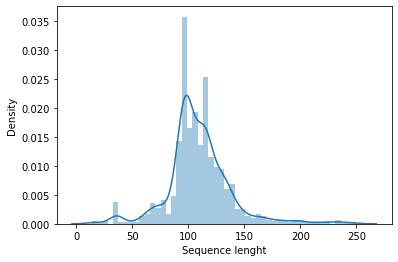

In [ ]:
df.drop(df[df['Sequence lenght'] >250  ].index , inplace=True)
sns.distplot(df['Sequence lenght'])
plt.show()


In [ ]:
df.drop(df[df['Sequence lenght'] > 120 ].index , inplace=True)
df.drop(df[df['Sequence lenght'] < 80 ].index , inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

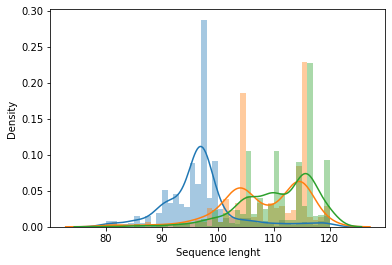

In [ ]:
for entry in df['Cross-reference (pfam)'].unique():
  sub_df= df.loc[df['Cross-reference (pfam)'] == entry]
  sns.distplot(sub_df['Sequence lenght'], label=entry, bins=40)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


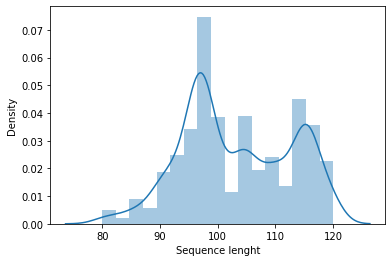

In [ ]:
sns.distplot(df['Sequence lenght'])
plt.show()

In [ ]:
df.drop('Sequence lenght', axis=1, inplace=True)
df.drop('Cross-reference (pfam)', axis=1, inplace=True)
file = "dataset.csv"
df.to_csv(file, index=None)

In [ ]:
go_terms = df['Gene ontology IDs']
go_terms

KeyError: ignored

In [ ]:
go_list =[]
go_terms.dropna(axis=0, inplace=True)
go_terms_list=go_terms.tolist()
for entry in go_terms_list:
  e=entry.replace(" ","")
  go_list.append(e.split(";"))
#go_list
go_flat_list = set([item for sublist in go_list for item in sublist])

In [ ]:
len(go_flat_list)

162

In [ ]:
query = ""
for entry in go_flat_list:
  query=query+entry+","
query

'GO:0001878,GO:0009408,GO:0048572,GO:0051382,GO:0031844,GO:0032903,GO:0042117,GO:0019732,GO:0008408,GO:0005184,GO:0043005,GO:0051930,GO:0004672,GO:0008284,GO:0000712,GO:1904058,GO:0045938,GO:0090275,GO:0005509,GO:0005737,GO:0010447,GO:0007584,GO:0005794,GO:0008217,GO:0016757,GO:0030425,GO:0032100,GO:0006919,GO:0007049,GO:0030350,GO:1904000,GO:0045187,GO:0021987,GO:0005975,GO:0006596,GO:0007267,GO:0016758,GO:0031843,GO:0003682,GO:0050731,GO:1903999,GO:0007193,GO:0043200,GO:0030334,GO:0007268,GO:0005524,GO:0030072,GO:0031334,GO:0048545,GO:0016740,GO:0005615,GO:0090729,GO:2000986,GO:0000176,GO:0000166,GO:0030252,GO:0007631,GO:0007218,GO:0001836,GO:0009306,GO:0007165,GO:0032099,GO:0008194,GO:0006396,GO:0050832,GO:0008081,GO:1901215,GO:0031877,GO:0031841,GO:0005739,GO:0002865,GO:0004930,GO:0007568,GO:0031514,GO:0006281,GO:2000987,GO:0070374,GO:0010243,GO:0005604,GO:0008285,GO:0005886,GO:0014049,GO:2000253,GO:0032094,GO:0043203,GO:0043065,GO:0031297,GO:0005201,GO:0048471,GO:0003676,GO:003187

In [ ]:
import requests, sys
import json

requestURL = "https://www.ebi.ac.uk/QuickGO/services/ontology/go/terms/"+str(query)

r = requests.get(requestURL, headers={ "Accept" : "application/json"})

if not r.ok:
  r.raise_for_status()
  sys.exit()

responseBody = json.loads(r.text)

go_dict = {}

number_of_gos = responseBody["numberOfHits"]
for i in range(1,number_of_gos):
  go_dict[responseBody['results'][i]['id']] = responseBody['results'][i]['name']


In [ ]:
go_dict

{'GO:0000166': 'nucleotide binding',
 'GO:0000176': 'nuclear exosome (RNase complex)',
 'GO:0000712': 'resolution of meiotic recombination intermediates',
 'GO:0000777': 'condensed chromosome kinetochore',
 'GO:0001664': 'G protein-coupled receptor binding',
 'GO:0001764': 'neuron migration',
 'GO:0001836': 'release of cytochrome c from mitochondria',
 'GO:0001878': 'response to yeast',
 'GO:0002865': 'negative regulation of acute inflammatory response to antigenic stimulus',
 'GO:0003676': 'nucleic acid binding',
 'GO:0003994': 'aconitate hydratase activity',
 'GO:0004616': 'phosphogluconate dehydrogenase (decarboxylating) activity',
 'GO:0004672': 'protein kinase activity',
 'GO:0004674': 'protein serine/threonine kinase activity',
 'GO:0004930': 'G protein-coupled receptor activity',
 'GO:0005102': 'signaling receptor binding',
 'GO:0005179': 'hormone activity',
 'GO:0005184': 'neuropeptide hormone activity',
 'GO:0005201': 'extracellular matrix structural constituent',
 'GO:0005246

In [ ]:
df

,Taxonomic lineage (SUPERKINGDOM),Taxonomic lineage (KINGDOM),Taxonomic lineage (PHYLUM),Taxonomic lineage (CLASS),Taxonomic lineage (ORDER),Taxonomic lineage (GENUS),Taxonomic lineage (SPECIES),Cross-reference (pfam),Sequence,Keyword ID_0,Keyword ID_1,Keyword ID_2,Keyword ID_3,Keyword ID_4,Keyword ID_5,Keyword ID_6,Keyword ID_7,Keyword ID_8,Keyword ID_9,Keyword ID_10,Keyword ID_11,Gene ontology IDs_0,Gene ontology IDs_1,Gene ontology IDs_2,Gene ontology IDs_3,Gene ontology IDs_4,Gene ontology IDs_5,Gene ontology IDs_6,Gene ontology IDs_7,Gene ontology IDs_8,Gene ontology IDs_9,Gene ontology IDs_10,Gene ontology IDs_11,Gene ontology IDs_12,Gene ontology IDs_13,Gene ontology IDs_14,Gene ontology IDs_15,Gene ontology IDs_16,Gene ontology IDs_17,Gene ontology IDs_18,Gene ontology IDs_19,Gene ontology IDs_20,Gene ontology IDs_21,Gene ontology IDs_22,Gene ontology IDs_23,Gene ontology IDs_24,Gene ontology IDs_25,Gene ontology IDs_26,Gene ontology IDs_27,Gene ontology IDs_28,Gene ontology IDs_29,Gene ontology IDs_30,Gene ontology IDs_31,Gene ontology IDs_32,Gene ontology IDs_33,Gene ontology IDs_34,Gene ontology IDs_35,Gene ontology IDs_36,Gene ontology IDs_37,Gene ontology IDs_38,Gene ontology IDs_39,Gene ontology IDs_40
0,Eukaryota,Metazoa,Chordata,Actinopteri,Amiiformes,Amia,Amia calva (Bowfin),PF00159;,YPPKPENPGEDAPPEELARYYTALRHYINLITRQRY,KW-0027,KW-0372,KW-0903,KW-0964,None,None,None,None,None,None,None,None,GO:0005179,GO:0005576,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Eukaryota,Metazoa,Chordata,Mammalia,Primates,Homo,Homo sapiens (Human),PF00159;,MVSVCRPWPAVAIALLALLVCLGALVDTCPIKPEAPGEDESLEELS...,KW-0621,KW-0732,KW-0964,KW-1185,None,None,None,None,None,None,None,None,GO:0001664,GO:0005179,GO:0005184,GO:0005615,GO:0007218,GO:0007631,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Eukaryota,Metazoa,Chordata,Actinopteri,Anguilliformes (true eels),Anguilla,Anguilla japonica (Japanese eel),PF00159;,MAVVLKPWTVLVALVLCLLVCLGTFVDAYPPKPENPGEDASPEEQA...,KW-0027,KW-0165,KW-0372,KW-0527,KW-0732,KW-0964,None,None,None,None,None,None,GO:0005179,GO:0005576,GO:0007218,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Eukaryota,Metazoa,Chordata,Amphibia,Anura,Pelophylax,Pelophylax ridibundus (Marsh frog) (Rana ridib...,PF00159;,YPPKPENPGEDASPEEMTKYLTALRHYINLVTRQRY,KW-0027,KW-0372,KW-0903,KW-0964,None,None,None,None,None,None,None,None,GO:0005179,GO:0005576,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Eukaryota,Metazoa,Chordata,Actinopteri,NaN,Dicentrarchus,Dicentrarchus labrax (European seabass) (Moron...,PF00159;,MIHSGAVMSMSILAFCLLACIHSGINAYPAKPASPRDGAPPEELAK...,KW-0027,KW-0165,KW-0372,KW-0527,KW-0732,KW-0964,None,None,None,None,None,None,GO:0005179,GO:0005576,GO:0007218,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,Eukaryota,Metazoa,Chordata,Mammalia,Sirenia (manatees and dugongs (seacows)),Trichechus,Trichechus manatus (Caribbean manatee) (West I...,PF03002;,MLSCRLQCALAALSIALALGGVTGAPSDPRLRQFLQKSLAAAAGKQ...,KW-0732,KW-1015,KW-1185,None,None,None,None,None,None,None,None,None,GO:00